In [1]:
from aif360.datasets import AdultDataset, CompasDataset
from aif360.metrics import BinaryLabelDatasetMetric

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[Reductions]'
pip install 'aif360[Reductions]'
pip install 'aif360[inFairness]'
pip install 'aif360[Reductions]'


In [2]:
comp_protected = 'race'
ad_protected = 'sex'

ad = AdultDataset(protected_attribute_names=[ad_protected],
    privileged_classes=[['Male']], categorical_features=[],
    features_to_keep=['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week'])
comp = CompasDataset(protected_attribute_names=[comp_protected],
                     privileged_classes=[["Caucasian"]],
                     features_to_keep=["age_cat", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", "c_charge_degree", "c_charge_desc"])


In [3]:
ad_df = ad.convert_to_dataframe()[0]
comp_df = comp.convert_to_dataframe()[0]
comp_df = comp_df.filter(items=["race", "juv_fel_count", "juv_misd_count", "juv_other_count", "priors_count", "age_cat=Greater than 45", "age_cat=Less than 25", "two_year_recid", "c_charge_degree=F", "c_charge_degree=M"], axis="columns")
print(ad_df.shape)
print(comp_df.shape)

(48842, 7)
(6167, 10)


In [9]:
ad_df.describe()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income-per-year
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,10.078089,0.668482,1079.067626,87.502314,40.422382,0.239282
std,13.710510,2.570973,0.470764,7452.019058,403.004552,12.391444,0.426649
min,17.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,9.000000,0.000000,0.000000,0.000000,40.000000,0.000000
50%,37.000000,10.000000,1.000000,0.000000,0.000000,40.000000,0.000000
75%,48.000000,12.000000,1.000000,0.000000,0.000000,45.000000,0.000000
max,90.000000,16.000000,1.000000,99999.000000,4356.000000,99.000000,1.000000


In [10]:
comp_df.describe()

,race,juv_fel_count,juv_misd_count,juv_other_count,priors_count,age_cat=Greater than 45,age_cat=Less than 25,two_year_recid,c_charge_degree=F,c_charge_degree=M
count,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000,6167.000000
mean,0.340522,0.059186,0.091292,0.110751,3.247446,0.209502,0.218421,0.455489,0.643100,0.356900
std,0.473923,0.463630,0.498067,0.470911,4.745320,0.406986,0.413208,0.498055,0.479124,0.479124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,20.000000,13.000000,9.000000,38.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
print(ad_df[ad_protected].value_counts())
print(ad_df["income-per-year"].value_counts())

sex
1.0    32650
0.0    16192
Name: count, dtype: int64
income-per-year
0.0    37155
1.0    11687
Name: count, dtype: int64


In [12]:
print(comp_df[comp_protected].value_counts())
print(comp_df["two_year_recid"].value_counts())

race
0.0    4067
1.0    2100
Name: count, dtype: int64
two_year_recid
0.0    3358
1.0    2809
Name: count, dtype: int64


In [5]:
ad_priv_labeldist = ad_df[ad_df[ad_protected] == 1]["income-per-year"].value_counts()
ad_unpriv_labeldist = ad_df[ad_df[ad_protected] == 0]["income-per-year"].value_counts()

print(ad_priv_labeldist)
print(ad_unpriv_labeldist)

ad_priv_nooflabels = np.array([ad_priv_labeldist[1], ad_priv_labeldist[0]])
ad_unpriv_nooflabels = np.array([ad_unpriv_labeldist[1], ad_unpriv_labeldist[0]])
labels = ["Positive Outcome", "Negative Outcome"]

comp_priv_labeldist = comp_df[comp_df[comp_protected] == 0]["two_year_recid"].value_counts()
comp_unpriv_labeldist = comp_df[comp_df[comp_protected] == 1]["two_year_recid"].value_counts()

comp_priv_nooflabels = np.array([comp_priv_labeldist[1], comp_priv_labeldist[0]])
comp_unpriv_nooflabels = np.array([comp_unpriv_labeldist[1], comp_unpriv_labeldist[0]])

income-per-year
0.0    22732
1.0     9918
Name: count, dtype: int64
income-per-year
0.0    14423
1.0     1769
Name: count, dtype: int64


for the unprivilaged group, the positive/negative label distribution is significantly skewed towards the negative outcome

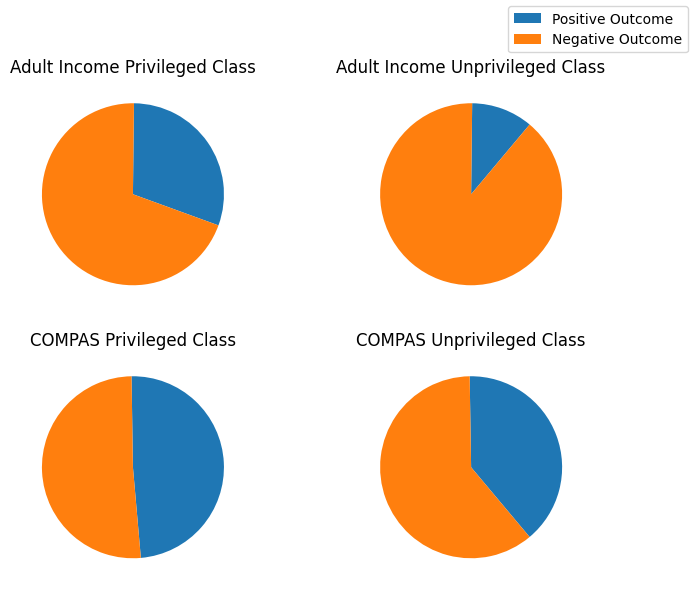

In [6]:
fig, ax = plt.subplots(2, 2, figsize=(8,6.5))

ax[0,0].pie(ad_priv_nooflabels, startangle=340)
ax[0,0].set_title("Adult Income Privileged Class")
ax[0,1].pie(ad_unpriv_nooflabels, startangle=50)
ax[0,1].set_title("Adult Income Unprivileged Class")

ax[1,0].pie(comp_priv_nooflabels, startangle=275)
ax[1,0].set_title("COMPAS Privileged Class")
ax[1,1].pie(comp_unpriv_nooflabels, startangle=310)
ax[1,1].set_title("COMPAS Unprivileged Class")
fig.legend(labels=labels)
plt.savefig("adult priv vs unpriv outcome dist.png")
plt.show()

In [7]:
print(comp_df[comp_protected].value_counts())
print(comp_df["two_year_recid"].value_counts())

race
0.0    4067
1.0    2100
Name: count, dtype: int64
two_year_recid
0.0    3358
1.0    2809
Name: count, dtype: int64


In [8]:
print(comp_df[comp_df[comp_protected] == 0]["two_year_recid"].value_counts())
print(comp_df[comp_df[comp_protected] == 1]["two_year_recid"].value_counts())

two_year_recid
0.0    2080
1.0    1987
Name: count, dtype: int64
two_year_recid
0.0    1278
1.0     822
Name: count, dtype: int64
